In [ ]:
#importing all the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import t


In [ ]:
#importing the dataset
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089


Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089
To: /content/bike_sharing.csv?1642089089
100% 648k/648k [00:00<00:00, 60.4MB/s]


In [ ]:
df=pd.read_csv("/content/bike_sharing.csv?1642089089")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# 1)  Define Problem Statement and perform Exploratory Data Analysis

#About Yulu


Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

#1.1) Define Problem Statement


Yulu has recently suffered considerable dips in its revenues.

They want to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.




  The company wants to know:



1.  Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
2.   How well those variables describe the electric cycle demands.





#1.2) Observations on shape of data, data types of all the attributes,  missing value detection, statistical summary.

In [ ]:
# observing the data

df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
#Checking the shape of the dataset
print(f"The shape of the dataset={df.shape}")
print(f"No of records in the dataset={df.shape[0]}")
print(f"No of features in the dataset={df.shape[1]}")

The shape of the dataset=(10886, 12)
No of records in the dataset=10886
No of features in the dataset=12


The dataset consist of 10886 records and 12 features.

In [ ]:
#Checking the datatypes of different attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


Missing value detection

In [ ]:
#missibg value detection
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

There are no missing values in the dataset

In [ ]:
#checking duplicates
df.duplicated().sum()

0

No duplicates in the dataset

Statistical summary

In [ ]:
#statistical summary
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
#checking the info related to categorical varibales

df.describe(include="object")

,datetime
count,10886
unique,10886
top,2011-01-01 00:00:00
freq,1


In [ ]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [ ]:
#checking the unique values

# Season 
print(f"The unique values in season columns are : {df['season'].unique()}\n")
print(f"The no: of unique values in the season column is: {df['season'].nunique()}")

The unique values in season columns are : [1 2 3 4]

The no: of unique values in the season column is: 4


In [ ]:
# datetime

print(f"The unique values in datetime columns are : {df['datetime'].unique()}\n")
print(f"The no: of unique values in the datetime column is: {df['datetime'].nunique()}")


The unique values in datetime columns are : ['2011-01-01 00:00:00' '2011-01-01 01:00:00' '2011-01-01 02:00:00' ...
 '2012-12-19 21:00:00' '2012-12-19 22:00:00' '2012-12-19 23:00:00']

The no: of unique values in the datetime column is: 10886


In [ ]:
# holiday

print(f"The unique values in holiday columns are : {df['holiday'].unique()}\n")
print(f"The no: of unique values in the holiday column is: {df['holiday'].nunique()}")

The unique values in holiday columns are : [0 1]

The no: of unique values in the holiday column is: 2


In [ ]:
# workingday

print(f"The unique values in workingday columns are : {df['workingday'].unique()}\n")
print(f"The no: of unique values in the workingday column is: {df['workingday'].nunique()}")

The unique values in workingday columns are : [0 1]

The no: of unique values in the workingday column is: 2


In [ ]:
# weather

print(f"The unique values in weather columns are : {df['weather'].unique()}\n")
print(f"The no: of unique values in the weather column is: {df['weather'].nunique()}")

The unique values in weather columns are : [1 2 3 4]

The no: of unique values in the weather column is: 4


In [ ]:
# temp

print(f"The unique values in temp columns are : {df['temp'].unique()}\n")
print(f"The no: of unique values in the temp column is: {df['temp'].nunique()}")

The unique values in temp columns are : [ 9.84  9.02  8.2  13.12 15.58 14.76 17.22 18.86 18.04 16.4  13.94 12.3
 10.66  6.56  5.74  7.38  4.92 11.48  4.1   3.28  2.46 21.32 22.96 23.78
 24.6  19.68 22.14 20.5  27.06 26.24 25.42 27.88 28.7  30.34 31.16 29.52
 33.62 35.26 36.9  32.8  31.98 34.44 36.08 37.72 38.54  1.64  0.82 39.36
 41.  ]

The no: of unique values in the temp column is: 49


In [ ]:
# atemp

print(f"The unique values in atemp columns are : {df['atemp'].unique()}\n")
print(f"The no: of unique values in the atemp column is: {df['atemp'].nunique()}")

The unique values in atemp columns are : [14.395 13.635 12.88  17.425 19.695 16.665 21.21  22.725 21.97  20.455
 11.365 10.605  9.85   8.335  6.82   5.305  6.06   9.09  12.12   7.575
 15.91   3.03   3.79   4.545 15.15  18.18  25.    26.515 27.275 29.545
 23.485 25.76  31.06  30.305 24.24  18.94  31.82  32.575 33.335 28.79
 34.85  35.605 37.12  40.15  41.665 40.91  39.395 34.09  28.03  36.365
 37.88  42.425 43.94  38.635  1.515  0.76   2.275 43.18  44.695 45.455]

The no: of unique values in the atemp column is: 60


In [ ]:
# humidity

print(f"The unique values in humidity columns are : {df['humidity'].unique()}\n")
print(f"The no: of unique values in the humidity column is: {df['humidity'].nunique()}")

The unique values in humidity columns are : [ 81  80  75  86  76  77  72  82  88  87  94 100  71  66  57  46  42  39
  44  47  50  43  40  35  30  32  64  69  55  59  63  68  74  51  56  52
  49  48  37  33  28  38  36  93  29  53  34  54  41  45  92  62  58  61
  60  65  70  27  25  26  31  73  21  24  23  22  19  15  67  10   8  12
  14  13  17  16  18  20  85   0  83  84  78  79  89  97  90  96  91]

The no: of unique values in the humidity column is: 89


In [ ]:
# windspeed

print(f"The unique values in windspeed columns are : {df['windspeed'].unique()}\n")
print(f"The no: of unique values in the windspeed column is: {df['windspeed'].nunique()}")

The unique values in windspeed columns are : [ 0.      6.0032 16.9979 19.0012 19.9995 12.998  15.0013  8.9981 11.0014
 22.0028 30.0026 23.9994 27.9993 26.0027  7.0015 32.9975 36.9974 31.0009
 35.0008 39.0007 43.9989 40.9973 51.9987 46.0022 50.0021 43.0006 56.9969
 47.9988]

The no: of unique values in the windspeed column is: 28


In [ ]:
# casual

print(f"The unique values in casual columns are : {df['casual'].unique()}\n")
print(f"The no: of unique values in the casual column is: {df['casual'].nunique()}")

The unique values in casual columns are : [  3   8   5   0   2   1  12  26  29  47  35  40  41  15   9   6  11   4
   7  16  20  19  10  13  14  18  17  21  33  23  22  28  48  52  42  24
  30  27  32  58  62  51  25  31  59  45  73  55  68  34  38 102  84  39
  36  43  46  60  80  83  74  37  70  81 100  99  54  88  97 144 149 124
  98  50  72  57  71  67  95  90 126 174 168 170 175 138  92  56 111  89
  69 139 166 219 240 147 148  78  53  63  79 114  94  85 128  93 121 156
 135 103  44  49  64  91 119 167 181 179 161 143  75  66 109 123 113  65
  86  82 132 129 196 142 122 106  61 107 120 195 183 206 158 137  76 115
 150 188 193 180 127 154 108  96 110 112 169 131 176 134 162 153 210 118
 141 146 159 178 177 136 215 198 248 225 194 237 242 235 224 236 222  77
  87 101 145 182 171 160 133 105 104 187 221 201 205 234 185 164 200 130
 155 116 125 204 186 214 245 218 217 152 191 256 251 262 189 212 272 223
 208 165 229 151 117 199 140 226 286 352 357 367 291 233 190 283 295 232
 173 184 

In [ ]:
# registered

print(f"The unique values in registered columns are : {df['registered'].unique()}\n")
print(f"The no: of unique values in the registered column is: {df['registered'].nunique()}")

The unique values in registered columns are : [ 13  32  27  10   1   0   2   7   6  24  30  55  47  71  70  52  26  31
  25  17  16   8   4  19  46  54  73  64  67  58  43  29  20   9   5   3
  63 153  81  33  41  48  53  66 146 148 102  49  11  36  92 177  98  37
  50  79  68 202 179 110  34  87 192 109  74  65  85 186 166 127  82  40
  18  95 216 116  42  57  78  59 163 158  51  76 190 125 178  39  14  15
  56  60  90  83  69  28  35  22  12  77  44  38  75 184 174 154  97 214
  45  72 130  94 139 135 197 137 141 156 117 155 134  89  80 108  61 124
 132 196 107 114 172 165 105 119 183 175  88  62  86 170 145 217  91 195
 152  21 126 115 223 207 123 236 128 151 100 198 157 168  84  99 173 121
 159  93  23 212 111 193 103 113 122 106  96 249 218 194 213 191 142 224
 244 143 267 256 211 161 131 246 118 164 275 204 230 243 112 238 144 185
 101 222 138 206 104 200 129 247 140 209 136 176 120 229 210 133 259 147
 227 150 282 162 265 260 189 237 245 205 308 283 248 303 291 280 208 286
 352 

In [ ]:
# count

print(f"The unique values in count columns are : {df['count'].unique()}\n")
print(f"The no: of unique values in the count column is: {df['count'].nunique()}")

The unique values in count columns are : [ 16  40  32  13   1   2   3   8  14  36  56  84  94 106 110  93  67  35
  37  34  28  39  17   9   6  20  53  70  75  59  74  76  65  30  22  31
   5  64 154  88  44  51  61  77  72 157  52  12   4 179 100  42  57  78
  97  63  83 212 182 112  54  48  11  33 195 115  46  79  71  62  89 190
 169 132  43  19  95 219 122  45  86 172 163  69  23   7 210 134  73  50
  87 187 123  15  25  98 102  55  10  49  82  92  41  38 188  47 178 155
  24  18  27  99 217 130 136  29 128  81  68 139 137 202  60 162 144 158
 117  90 159 101 118 129  26 104  91 113 105  21  80 125 133 197 109 161
 135 116 176 168 108 103 175 147  96 220 127 205 174 121 230  66 114 216
 243 152 199  58 166 170 165 160 140 211 120 145 256 126 223  85 206 124
 255 222 285 146 274 272 185 191 232 327 224 107 119 196 171 214 242 148
 268 201 150 111 167 228 198 204 164 233 257 151 248 235 141 249 194 259
 156 153 244 213 181 221 250 304 241 271 282 225 253 237 299 142 313 310
 207 138 2

#1.3)Univariate Analysis 

#Univariate- continuous

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


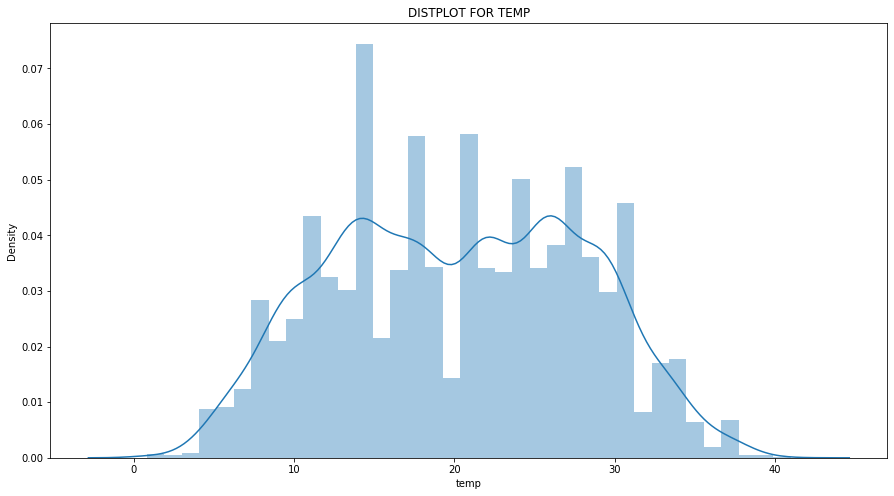

In [ ]:
#distplot for all continuous variables

#temp

plt.figure(figsize=(15,8))
plt.title("DISTPLOT FOR TEMP")
sns.distplot(df['temp'])
plt.show()

for majority days ,actual temperature lies in the approximately 15 deg celsius and  26 degree celsius. This may be due to the diffrence in seasons.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


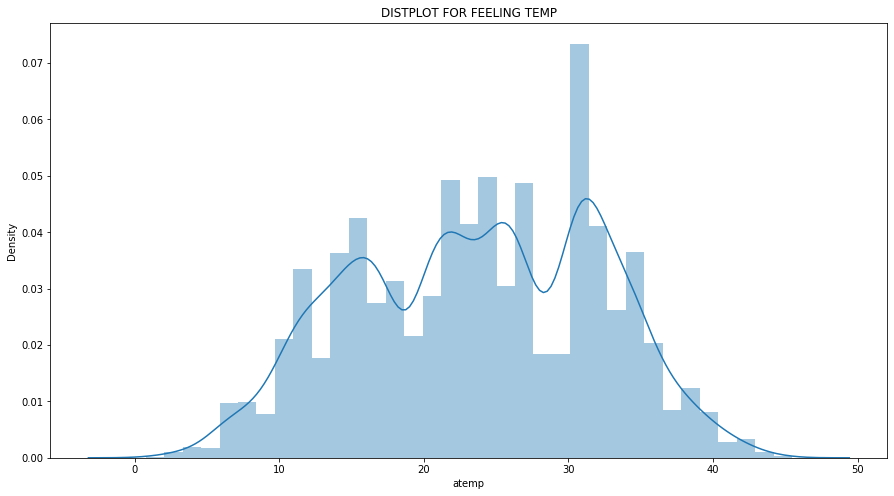

In [ ]:
#atemp (feeling temp)

plt.figure(figsize=(15,8))
plt.title('DISTPLOT FOR FEELING TEMP')
sns.distplot(df['atemp'])
plt.show()

For majority days, the feeling temperature was close to 32 deg celsius

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


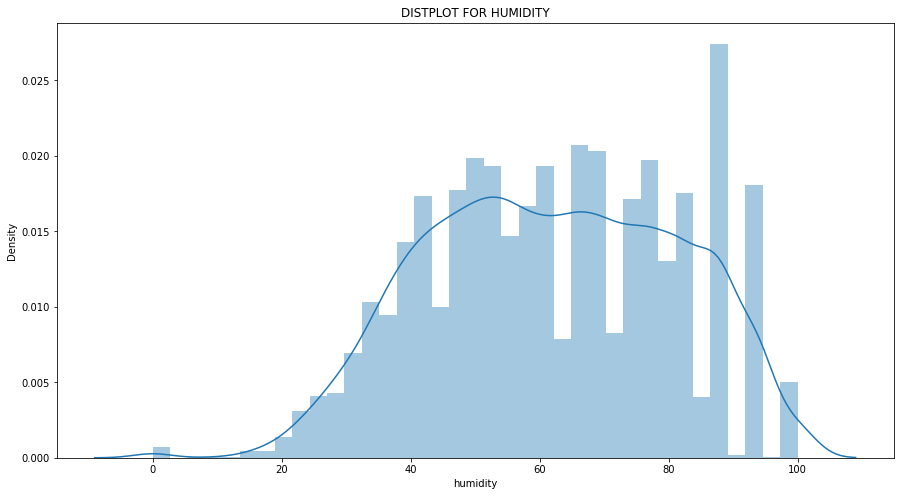

In [ ]:
#humidity

plt.figure(figsize=(15,8))
plt.title('DISTPLOT FOR HUMIDITY')
sns.distplot(df['humidity'])
plt.show()

For majority days the humidity was close to 88.

In [ ]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


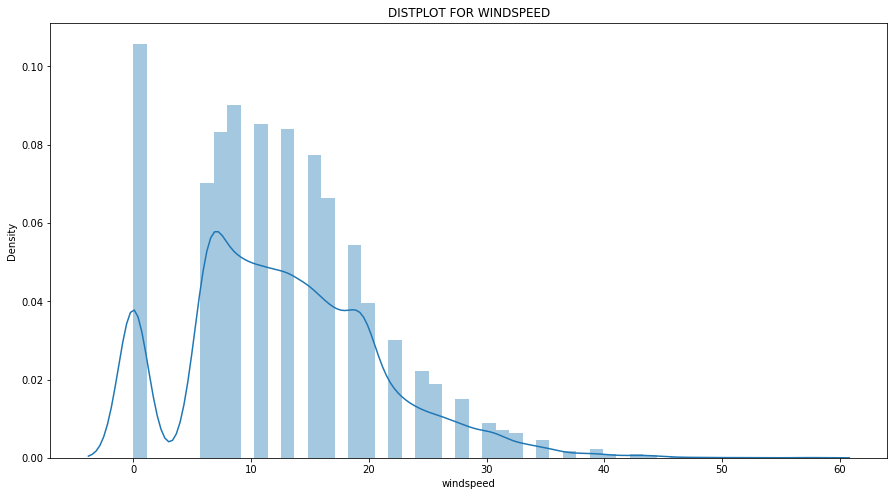

In [ ]:
#windspeed

plt.figure(figsize=(15,8))
plt.title('DISTPLOT FOR WINDSPEED')
sns.distplot(df['windspeed'])
plt.show()

for majority days the wind speed is about 9

#Univariate categorical

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


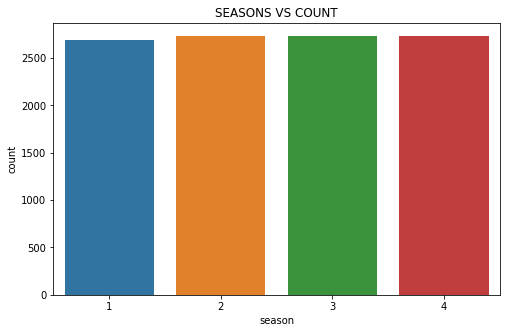

In [ ]:
#seasons
plt.figure(figsize=(8,5))
plt.title('SEASONS VS COUNT')
sns.countplot(df['season'])
plt.show()

The dataset consist almost similar number of records from each seasons

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


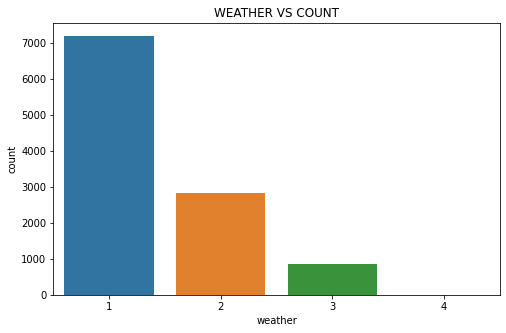

In [ ]:
#weather
plt.figure(figsize=(8,5))
plt.title('WEATHER VS COUNT')
sns.countplot(df['weather'])
plt.show()

The dataset consist of records mostly when weather was  1 (Clear, Few clouds, partly cloudy, partly cloudy)  and only 1 record
when weather was 4 ie,(Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


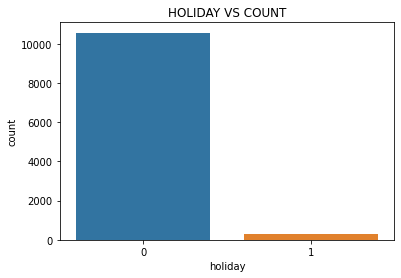

In [ ]:
sns.countplot(df['holiday'])
plt.title('HOLIDAY VS COUNT')
plt.show()

the dataset consist of more no:of records when it was not a govt holiday that other days

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


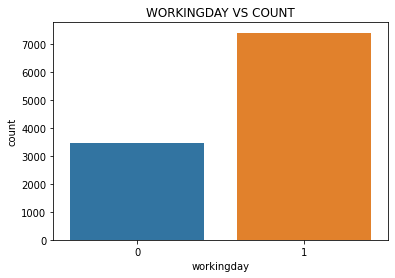

In [ ]:
sns.countplot(df['workingday'])
plt.title('WORKINGDAY VS COUNT')
plt.show()

The dataset consist of more no:of records when it was a workingday (neither weekend nor holiday)

#Bivariate categorical




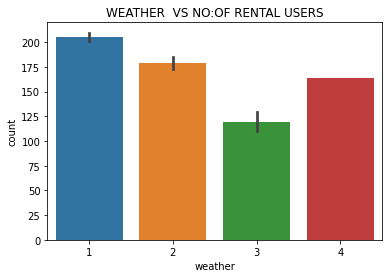

In [ ]:
#weather vs count plot
sns.barplot(data=df,x='weather',y='count')
plt.title('WEATHER  VS NO:OF RENTAL USERS')
plt.show()

the bookings were maximum in weather 1--(Clear, Few clouds, partly cloudy, partly cloudy)

least in weather 3  (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds)

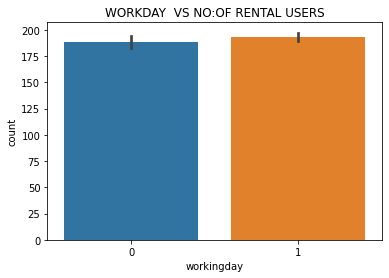

In [ ]:
#workday vs count
sns.barplot(data=df,x='workingday',y='count')
plt.title('WORKDAY  VS NO:OF RENTAL USERS')
plt.show()


Almost similar no:of rental users are there on both working days and other days

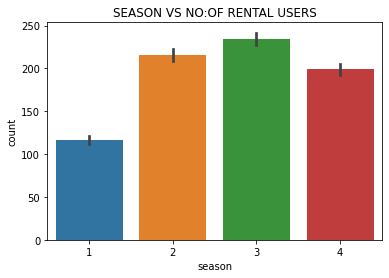

In [ ]:
#season vs count
sns.barplot(data=df,x='season',y='count')
plt.title('SEASON VS NO:OF RENTAL USERS')
plt.show()

The rental users are more during season 3(fall) and least during season 1 (spring) . 2,3 4 have almost equal number of users whereas 1 has significantly less number of users

#Bivariate continuous

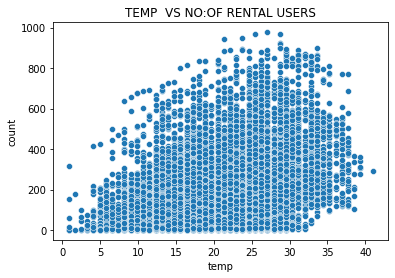

In [ ]:
#temp vs count
sns.scatterplot(data=df,x='temp',y='count')
plt.title('TEMP  VS NO:OF RENTAL USERS',loc='center')
plt.show()

More numbers of rental users are when the temp is between 22 and  28 degree celsius

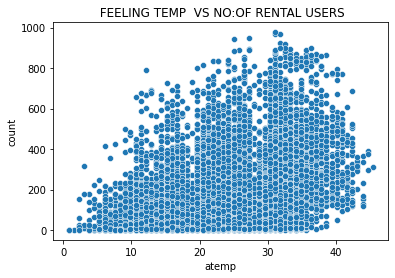

<Figure size 1440x1080 with 0 Axes>

In [ ]:
#atemp vs count
sns.scatterplot(data=df,x='atemp',y='count')
plt.title(' FEELING TEMP  VS NO:OF RENTAL USERS',loc='center')
plt.figure(figsize=(20,15))
plt.show()

The rental users are more when the feeling temperature is 30 deg celcius

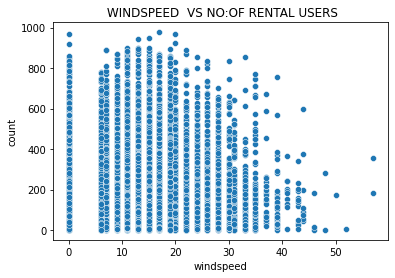

In [ ]:
#windspeed vs count
sns.scatterplot(data=df,x='windspeed',y='count')
plt.title(' WINDSPEED  VS NO:OF RENTAL USERS',loc='center')
plt.show()

There are more number of rental users when the windspeed is between 10 and 22. Also considerable number of users are there when windspeed is 0

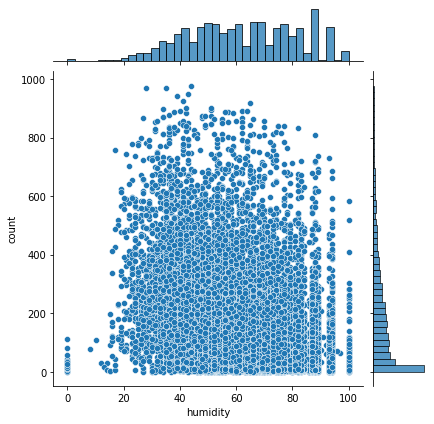

In [ ]:
#humidity vs count
sns.jointplot(data=df,x='humidity',y='count')

plt.show()

The rental users are more when the humidity is around 88

#1.4)Illustrate the insights based on EDA

#Comments on range of attributes, outliers of various attributes

In [ ]:
print(f" The earliest booking in the data set was made on {df['datetime'].min()}")
print(f" The latest booking in the data set was made on {df['datetime'].max()}")

 The earliest booking in the data set was made on 2011-01-01 00:00:00
 The latest booking in the data set was made on 2012-12-19 23:00:00


The data was taken between 2011-01-01 00:00:00 and 2012-12-19 23:00:00

In [ ]:
print(f"The seasons vary from {df['season'].min()} and {df['season'].max()} ")

The seasons vary from 1 and 4 


In [ ]:
print(f"The weather vary from {df['weather'].min()} and {df['weather'].max()} ")

The weather vary from 1 and 4 


In [ ]:
print(f"The temperature vary from {df['temp'].min()} and {df['temp'].max()} ")

The temperature vary from 0.82 and 41.0 


In [ ]:
print(f"The feeling temperature vary from {df['atemp'].min()} and {df['atemp'].max()} ")

The feeling temperature vary from 0.76 and 45.455 


In [ ]:
print(f"The windspeed vary from {df['windspeed'].min()} and {df['windspeed'].max()} ")

The windspeed vary from 0.0 and 56.9969 


In [ ]:
print(f"The humidity vary from {df['humidity'].min()} and {df['humidity'].max()} ")

The humidity vary from 0 and 100 


Outliers

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


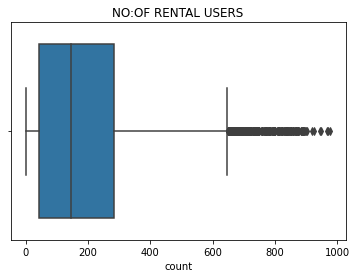

In [ ]:
 #count
 sns.boxplot(df['count'])
 plt.title("NO:OF RENTAL USERS")
 plt.show()

Mean of rental users in an hour is about 192

From the boxplot its clear that in some hours there were more than 620 rental users .All these can be considered as outliers

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


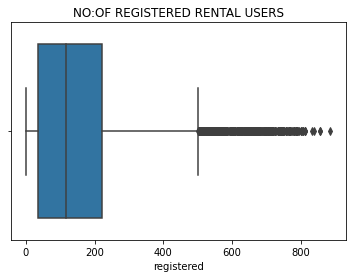

In [ ]:
 #registered user count
sns.boxplot(df['registered'])
plt.title("NO:OF REGISTERED RENTAL USERS")
plt.show()

The mean registered users in an hour is about 156

but in some hours there were more than 450 users.These can be considered outliers

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


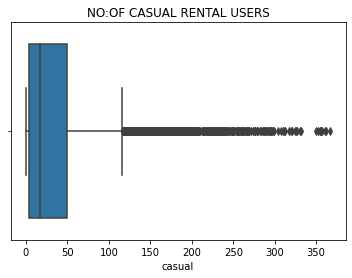

In [ ]:
 #casual user count
sns.boxplot(df['casual'])
plt.title("NO:OF CASUAL RENTAL USERS")
plt.show()

on an avg There are 36 casual users in an hour, But in  some hours there  were more than 120 casual users,This can be considered outliers

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


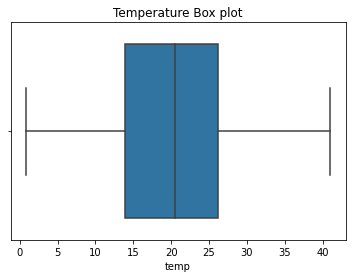

In [ ]:
sns.boxplot(df['temp'])
plt.title("Temperature Box plot")
plt.show()

No outliers are there in temp 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


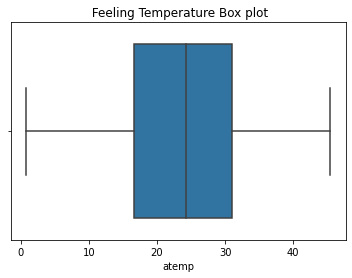

In [ ]:
sns.boxplot(df['atemp'])
plt.title(" Feeling Temperature Box plot")
plt.show()

No outliers are there in feeling temp

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


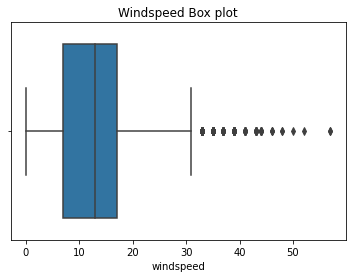

In [ ]:
sns.boxplot(df['windspeed'])
plt.title("Windspeed Box plot")
plt.show()

On an avg,windspeed in an hour is 12 , But there are some hours with windspeed more than 32 which can be considered outlier

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


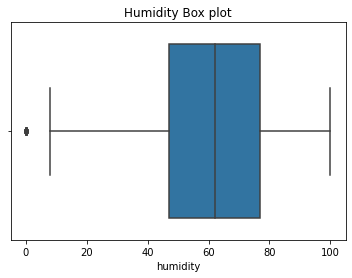

In [ ]:
sns.boxplot(df['humidity'])
plt.title("Humidity Box plot")
plt.show()

mean humidity in most hours was 62.But one outlier is there which is less than 10

#Comments on dstribution of variables and the relationships between them

In [ ]:
df['season'].unique()

array([1, 2, 3, 4])

In [ ]:
df['season'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

The seasons in the dataset is divides into [1, 2, 3, 4]

The dataset consist of 2734 hours data of season 4,2733 hours data of season 2, 2733 hours data of season 3 and 2686 hours data of season 1



In [ ]:
df['weather'].unique()


array([1, 2, 3, 4])

In [ ]:
df['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

The weather in the dataset is divided into [1, 2, 3, 4]


The dataset consist of 7192 hours data of weather 1, 2834 hours data of season 2, 859 hours data of season 3 and 1 hour data of season 4

In [ ]:
df['holiday'].unique()

array([0, 1])

In [ ]:
df['holiday'].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

The holidays can be either 0 or 1

The dataset consist of 10575 hours of data which was not holiday
311 hours of data which was holiday

In [ ]:
df['workingday'].unique()

array([0, 1])

In [ ]:
df['workingday'].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

The workingdays can be 0 or 1

The dataset consist of 7412 hrs of data of working days
and 3474 hours of other days

In [ ]:
df['temp'].unique()

array([ 9.84,  9.02,  8.2 , 13.12, 15.58, 14.76, 17.22, 18.86, 18.04,
       16.4 , 13.94, 12.3 , 10.66,  6.56,  5.74,  7.38,  4.92, 11.48,
        4.1 ,  3.28,  2.46, 21.32, 22.96, 23.78, 24.6 , 19.68, 22.14,
       20.5 , 27.06, 26.24, 25.42, 27.88, 28.7 , 30.34, 31.16, 29.52,
       33.62, 35.26, 36.9 , 32.8 , 31.98, 34.44, 36.08, 37.72, 38.54,
        1.64,  0.82, 39.36, 41.  ])

In [ ]:
df['temp'].value_counts()

14.76    467
26.24    453
28.70    427
13.94    413
18.86    406
22.14    403
25.42    403
16.40    400
22.96    395
27.06    394
24.60    390
12.30    385
21.32    362
17.22    356
13.12    356
29.52    353
10.66    332
18.04    328
20.50    327
30.34    299
9.84     294
15.58    255
9.02     248
31.16    242
8.20     229
27.88    224
23.78    203
32.80    202
11.48    181
19.68    170
6.56     146
33.62    130
5.74     107
7.38     106
31.98     98
34.44     80
35.26     76
4.92      60
36.90     46
4.10      44
37.72     34
36.08     23
3.28      11
0.82       7
38.54      7
39.36      6
2.46       5
1.64       2
41.00      1
Name: temp, dtype: int64

The different temperatures and number of hours of those temperatures are shown above

In [ ]:
df['atemp'].unique()

array([14.395, 13.635, 12.88 , 17.425, 19.695, 16.665, 21.21 , 22.725,
       21.97 , 20.455, 11.365, 10.605,  9.85 ,  8.335,  6.82 ,  5.305,
        6.06 ,  9.09 , 12.12 ,  7.575, 15.91 ,  3.03 ,  3.79 ,  4.545,
       15.15 , 18.18 , 25.   , 26.515, 27.275, 29.545, 23.485, 25.76 ,
       31.06 , 30.305, 24.24 , 18.94 , 31.82 , 32.575, 33.335, 28.79 ,
       34.85 , 35.605, 37.12 , 40.15 , 41.665, 40.91 , 39.395, 34.09 ,
       28.03 , 36.365, 37.88 , 42.425, 43.94 , 38.635,  1.515,  0.76 ,
        2.275, 43.18 , 44.695, 45.455])

In [ ]:
df['atemp'].value_counts()

31.060    671
25.760    423
22.725    406
20.455    400
26.515    395
16.665    381
25.000    365
33.335    364
21.210    356
30.305    350
15.150    338
21.970    328
24.240    327
17.425    314
31.820    299
34.850    283
27.275    282
32.575    272
11.365    271
14.395    269
29.545    257
19.695    255
15.910    254
12.880    247
13.635    237
34.090    224
12.120    195
28.790    175
23.485    170
10.605    166
35.605    159
9.850     127
18.180    123
36.365    123
37.120    118
9.090     107
37.880     97
28.030     80
7.575      75
38.635     74
6.060      73
39.395     67
6.820      63
8.335      63
18.940     45
40.150     45
40.910     39
5.305      25
42.425     24
41.665     23
3.790      16
4.545      11
3.030       7
43.940      7
2.275       7
43.180      7
44.695      3
0.760       2
1.515       1
45.455      1
Name: atemp, dtype: int64

The different feeling temperatures and number of hours of those temperatures are shown above

In [ ]:
print(f" the most no of registered users in an hour ={df['registered'].max()}")
print(f" the least no of registered users in an hour ={df['registered'].min()}")

 the most no of registered users in an hour =886
 the least no of registered users in an hour =0


In [ ]:
print(f" the most no of casual users in an hour ={df['casual'].max()}")
print(f" the least no of casual users in an hour ={df['casual'].min()}")

 the most no of casual users in an hour =367
 the least no of casual users in an hour =0


In [ ]:
print(f" the most no of  users in an hour ={df['count'].max()}")
print(f" the least no of  users in an hour ={df['count'].min()}")

 the most no of  users in an hour =977
 the least no of  users in an hour =1


So the total number of users in an hour varies from 1 to 977

Relationships among different variables

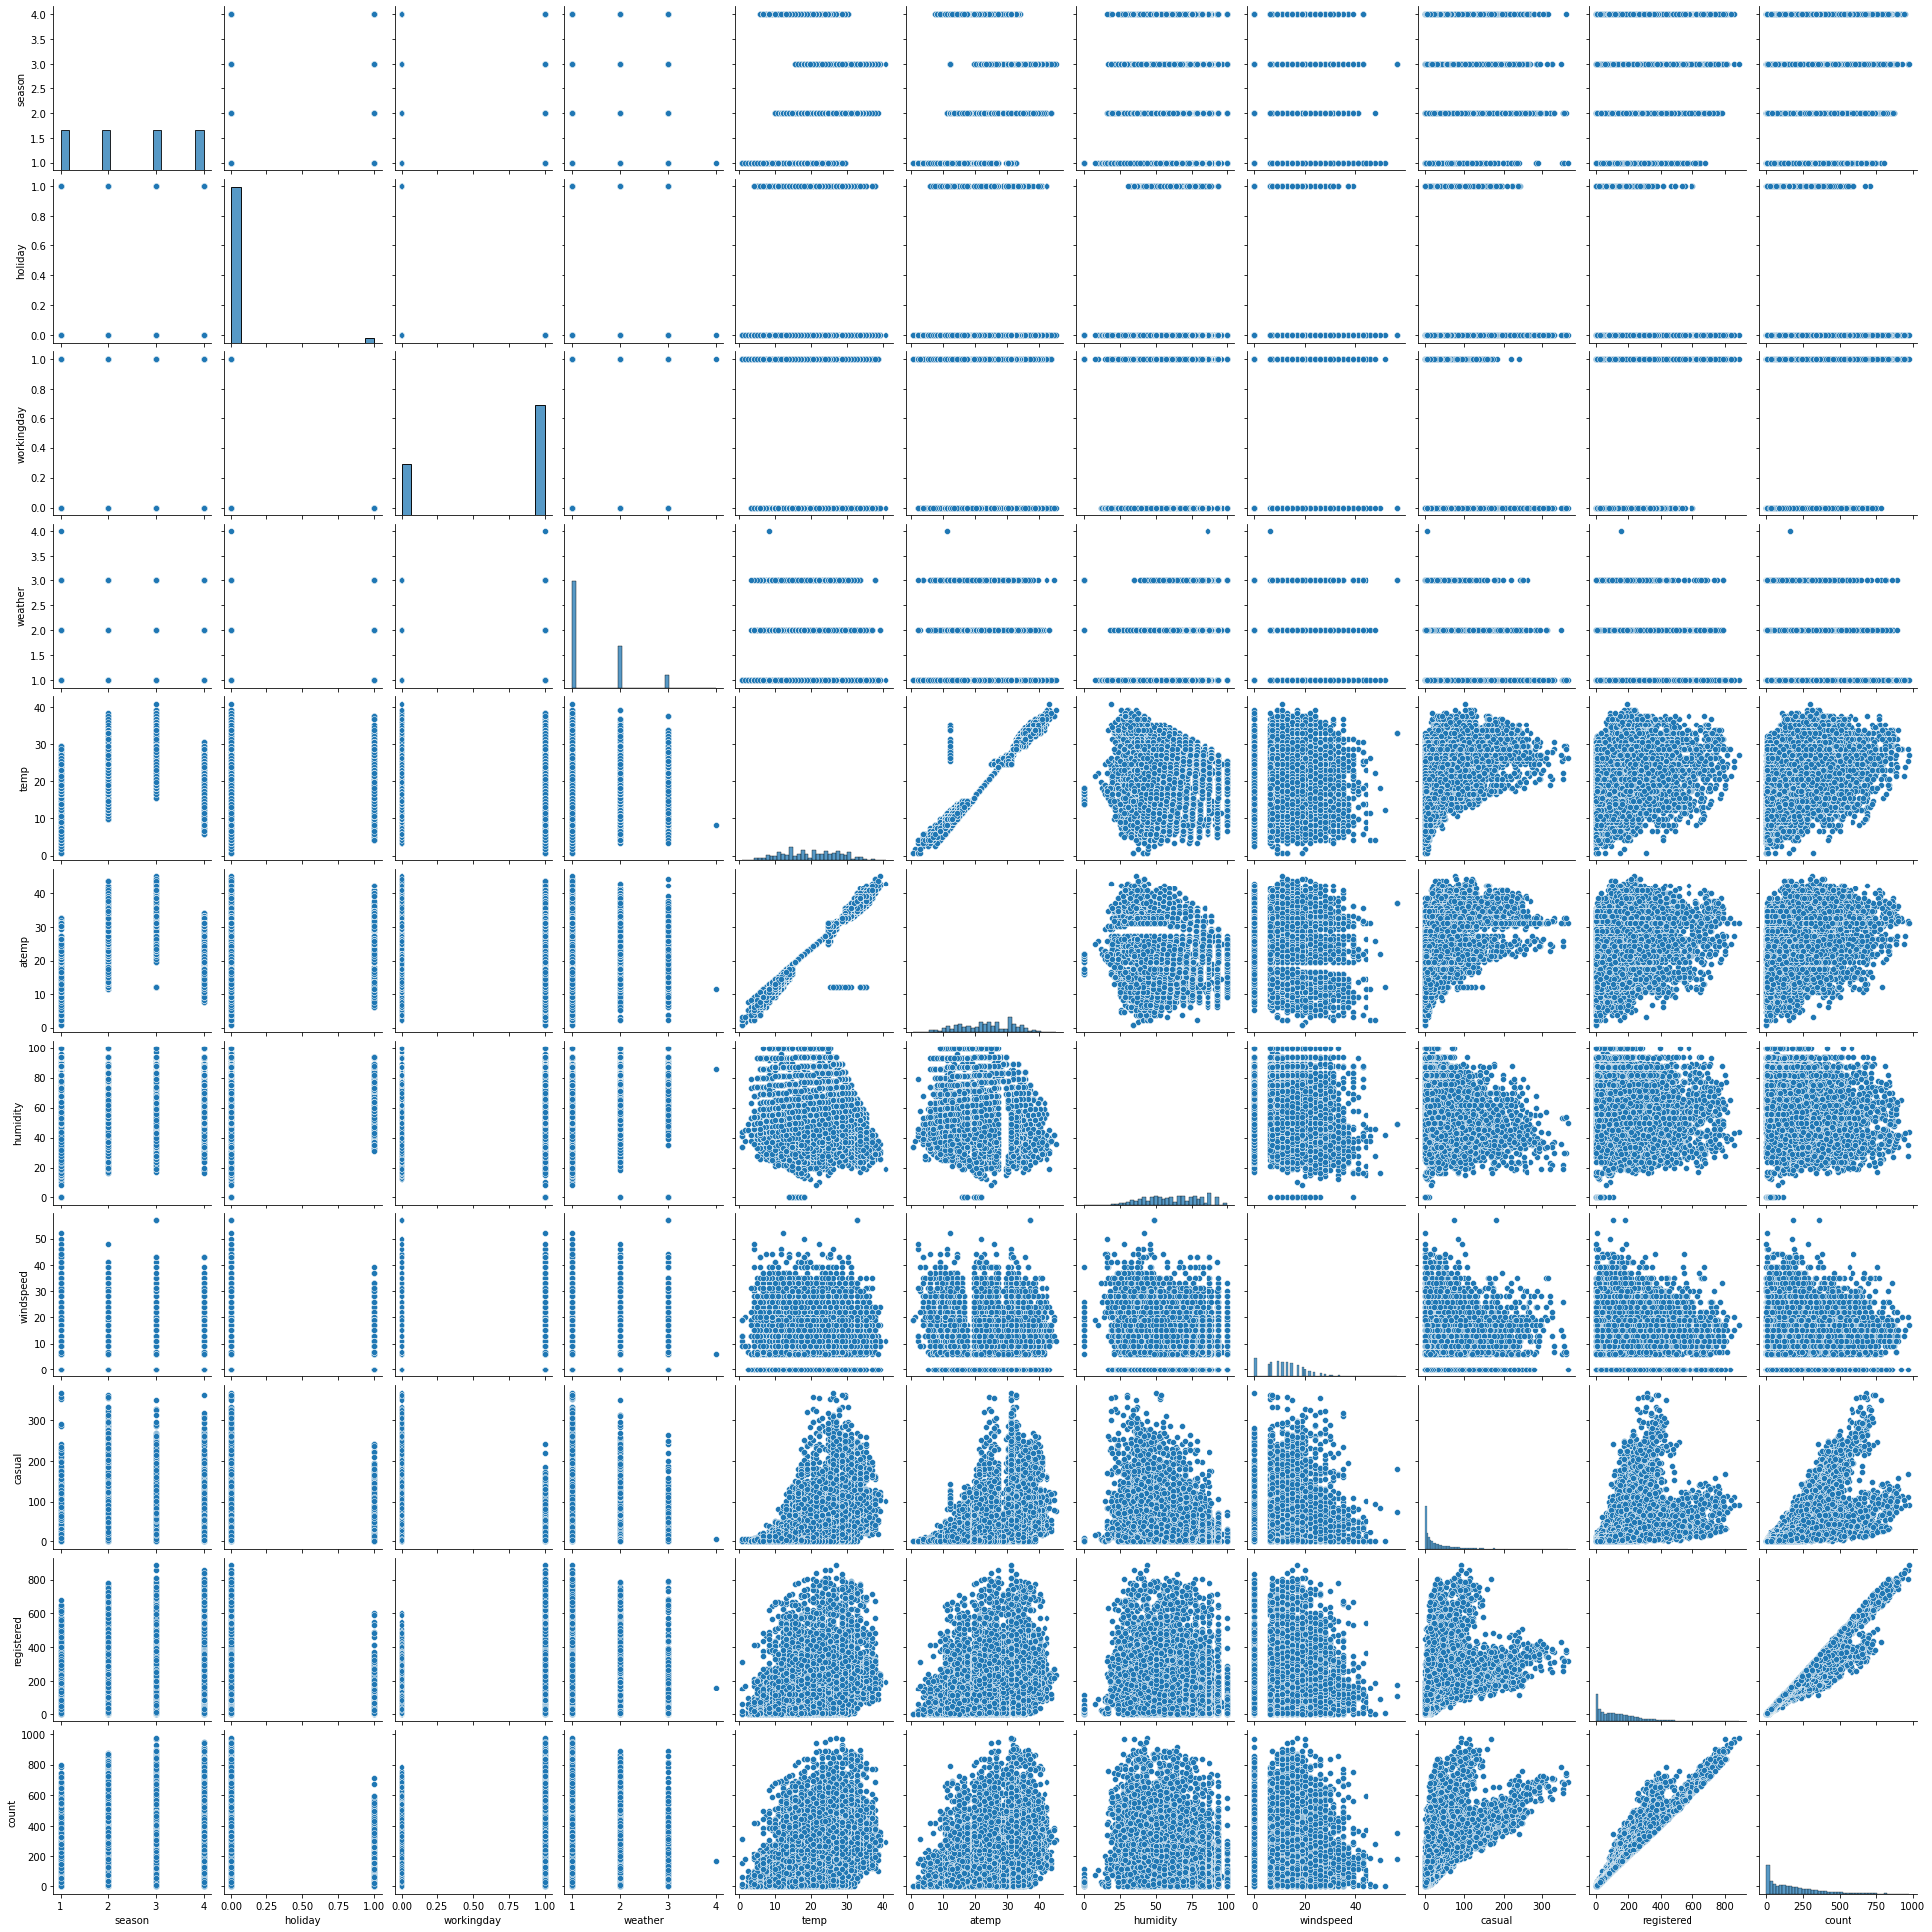

In [ ]:
sns.pairplot(df)

There is comparitively good correlation between registered users and total users.

There is comparitively good correlation between temperature  and total feeling temperature.


There is comparitively some positive correlation between humidity and weather.

<AxesSubplot:>

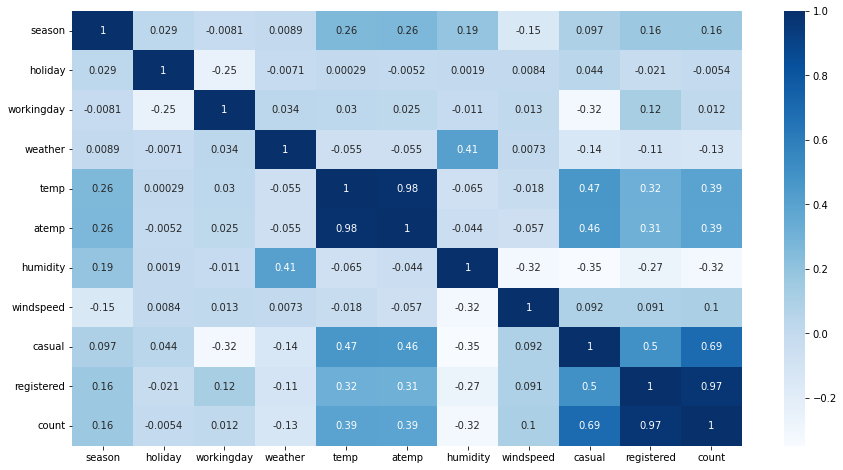

In [ ]:
#Heat Map
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), cmap= "Blues", annot=True)

There is comparitively good correlation between registered users and total users.

There is comparitively good correlation between temperature  and total feeling temperature.


There is comparitively some positive correlation between humidity and weather.

#Comments for each univariate and bivariate plots

Comments on each univariate and bivariate plots are given with the plots itself

#2 Hypothesis testing

#2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented

H0=mean(count of workingday)=mean(count of non-workingday)

Ha=mean(count of workingday)!=mean(count of non-workingday)

In [ ]:
#H0=mean(count of workingday)=mean(count of non-workingday)
#Ha=mean(count of workingday)!=mean(count of non-workingday)

#We need to do a two-tailed test

#1 denotes everything which is related to working day=1
#2 denotes everything which is related to working day=0

sample1=df.loc[df['workingday']==1]
sample2=df.loc[df['workingday']==0]
sample1=sample1['count']
sample2=sample2['count']


mu1=sample1.mean()

print('average count of users during workingdays=',mu1)

mu2=sample2.mean()

print('average count of users during  non-workingdays=',mu2)


std1=sample1.std()

print('sample standard deviation  users during workingdays=',std1)

std2=sample2.std()

print('sample standard deviation  users during non-workingdays=',std2)

n1=len(sample1)
n2=len(sample2)

#calculaing pooled sample std

s=np.sqrt((((n1-1)*(std1**2)) + ((n2-1)*(std2**2)))/(n1+n2-2))

print(f"pooled sample standard deviation is {s}")

#calculating t-stat

t_stat=(mu1-mu2)/(s*np.sqrt(1/n1 + 1/n2))

print(f"test-statistic={t_stat}")

#calculating p_value

deg_f=n1+n2-2
p_value=(1-t.cdf(t_stat,df=deg_f))*2
print(f"p_value={p_value}")

alpha=0.05

if p_value < alpha:
  print(f"Reject null hypothesis")
else:
  print(f"NO enough data to Reject null hypothesis")


average count of users during workingdays= 193.01187263896384
average count of users during  non-workingdays= 188.50662061024755
sample standard deviation  users during workingdays= 184.5136590421481
sample standard deviation  users during non-workingdays= 173.7240153250003
pooled sample standard deviation is 181.14059975128595
test-statistic=1.2096277376026696
p_value=0.22644804226361348
NO enough data to Reject null hypothesis


So we can conclude that working day and non-working day has no effect on count

In [ ]:
#verifying the test using stats library
from scipy.stats import ttest_ind

In [ ]:
ttest_ind(sample1,sample2,alternative='two-sided')

Ttest_indResult(statistic=1.2096277376026694, pvalue=0.22644804226361348)

Since p_value is not  less than significace level(0.05) we can conclude
that working day has no effect on no:of electric cycles rented 

#ANOVA to check if No. of cycles rented is similar or different in different 1. weather 2. season

1)weather

H0: mean(count of weather 1)=mean(count of weather2)=mean(count of weather 3)=mean(count of weather 4)

Ha: Atleast one pair has different mean(count)

In [ ]:
#weather
sam1=df[df['weather']==1]['count']
sam2=df[df['weather']==2]['count']
sam3=df[df['weather']==3]['count']
sam4=df[df['weather']==4]['count']

In [ ]:
print("avg count of users during weather 1=",sam1.mean())
print("avg count of users during weather 2=",sam2.mean())
print("avg count of users during weather 3=",sam3.mean())
print("avg count of users during weather 4=",sam4.mean())

avg count of users during weather 1= 205.23679087875416
avg count of users during weather 2= 178.95553987297106
avg count of users during weather 3= 118.84633294528521
avg count of users during weather 4= 164.0


In [ ]:
m1=sam1.mean()
m2=sam2.mean()
m3=sam3.mean()
m4=sam4.mean()

In [ ]:
m_o=(m1+m2+m3+m4)/4

In [ ]:
#computing between group variance

ssb=len(sam1) * (m1-m_o)**2 + len(sam2) * (m2-m_o)**2 + len(sam3) * (m3-m_o)**2 
ssb

13041200.765470978

In [ ]:
df_between_groups=3

In [ ]:
msb=ssb/df_between_groups
msb

4347066.921823659

In [ ]:
#computing within grp variance

temp1=np.array(sam1)
temp2=np.array(sam2)
temp3=np.array(sam3)
temp4=np.array(sam4)
ssw=0
ssw_1=((temp1-m1)**2).sum()
ssw_2=((temp2-m2)**2).sum()
ssw_3=((temp3-m3)**2).sum()
ssw_4=((temp4-m4)**2).sum()


ssw=ssw_1+ssw_2+ssw_3+ssw_2
ssw

431142600.25713027

In [ ]:
df_within_groups=len(temp1)+len(temp2)+len(temp3)+len(temp4)-4
df_within_groups

10882

In [ ]:
msw=ssw/df_within_groups
msw

39619.79417911507

In [ ]:
#calculating p-value

from scipy.stats import f

In [ ]:
f_oneway(sam1,sam2,sam3,sam4)

F_onewayResult(statistic=65.53024112793271, pvalue=5.482069475935669e-42)

Therefore we can conclude that No:of cycles rented depends on different weathers 

2) season

H0: mean(count of season 1)=mean(count of season2)=mean(count of season 3)=mean(count of season 4)

Ha: Atleast one pair has different mean(count)

In [ ]:
#season

season1=df[df['season']==1]['count']
season2=df[df['season']==2]['count']
season3=df[df['season']==3]['count']
season4=df[df['season']==4]['count']

In [ ]:
f_oneway(season1,season2,season3,season4)

F_onewayResult(statistic=236.94671081032106, pvalue=6.164843386499654e-149)

we can reject null hypothesis

Therefore we can conclude that No:of cycles rented depends on different  seasons

# chi2 test to check if Weather is dependent on the season

H0=weather is dependent on season

HA: weather is not dependent on season

In [ ]:
obs=pd.crosstab(df['weather'],df['season'])

In [ ]:
from scipy.stats import chi2_contingency
chi2_contingency(obs)

Chi2ContingencyResult(statistic=49.15865559689363, pvalue=1.5499250736864862e-07, dof=9, expected_freq=array([[1.77454639e+03, 1.80559765e+03, 1.80559765e+03, 1.80625831e+03],
       [6.99258130e+02, 7.11493845e+02, 7.11493845e+02, 7.11754180e+02],
       [2.11948742e+02, 2.15657450e+02, 2.15657450e+02, 2.15736359e+02],
       [2.46738931e-01, 2.51056403e-01, 2.51056403e-01, 2.51148264e-01]]))

Since p-value less than alpha(0.05) we can reject null hypothesis

so we can conclude that weather and seasons are independent

#INSIGHTS

1)Weather is significant in deciding the no:of cycles rented

2)The no:of Registered users is more as compared to casual users

3)The mean windspeed of all Hours is 12.8

4)The mean humidty of all Hours is 61.88645967297446

5)The mean temperature of all hours is 20.23085981995223 deg celcius

6)The mean feeling temperature of all hours is 23.655084052912 deg celcius

#RECOMMENDATIONS 

1) Weather is significant in deciding the no:of cycles rented.So the company can  come up with different strategies for different weathers

2)Season is significant in deciding the no:of cycles rented.So the company can  come up with different strategies for different Season

3)  The no:of Registered users is more as compared to casual users.
So the company should focus more on registered users.To maintain this,
company can provide some offers to registered users

4) The users in working day are more compared to those in holidays.
To improve situation on holidays,offers can be given on those days

5) The users are more when the humidity is around 88.So special offers can be given at this time to attract more customers
